#### Carregar arquivos concatenados como dataframe

## Análises de Dados comparativos

### Biblioteca de data science

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats # Para testes ANOVA, comparação entre médias

### Correlação - estudos

In [ ]:
dobr = pd.read_parquet('files___in_sim/dobr_merged_clean.parquet')
dobr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288204 entries, 0 to 485109
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CAUSABAS       288204 non-null  object 
 1   CODMUNRES      288204 non-null  object 
 2   SEXO           288204 non-null  object 
 3   RACACOR        288204 non-null  object 
 4   ANO            288204 non-null  int64  
 5   POP_MERGE      288204 non-null  object 
 6   obito_count    288204 non-null  int64  
 7   pop_under74    288204 non-null  float64
 8   UF             288204 non-null  object 
 9   classificacao  288204 non-null  object 
 10  mort_ind       288204 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 26.4+ MB


In [ ]:
# Describe das médias de mortalidade
dobr_uf = dobr.groupby('UF')['mort_ind']
dobr_uf.describe()

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid v

,count,mean,std,min,25%,50%,75%,max
UF,,,,,,,,
AC,1016.0,0.465878,3.507749,0.008292,0.033004,0.107991,0.263922,71.428571
AL,5011.0,1.128169,19.911780,0.003691,0.063367,0.160102,0.351247,1000.000000
AM,3813.0,1.014083,24.741862,0.001382,0.024608,0.089047,0.178987,1000.000000
AP,867.0,0.961956,17.677462,0.007113,0.018550,0.049790,0.168344,500.000000
BA,21915.0,inf,NaN,0.001621,0.065053,0.160694,0.329652,inf
CE,12440.0,inf,NaN,0.001334,0.040953,0.107147,0.230309,inf
DF,1317.0,0.015249,0.047901,0.001451,0.001731,0.003462,0.008027,0.404204
ES,6181.0,0.402856,5.365639,0.006734,0.029523,0.097924,0.259067,250.000000
GO,11572.0,0.984023,16.877243,0.002876,0.039008,0.131978,0.405351,1000.000000


In [ ]:
import statsmodels.api as sm
df1 = dobr
var_cat = 'SEXO'
valor = 'mort_ind'



# Criando variáveis dummy para as categorias
df = pd.get_dummies(df1, columns=[var_cat])

# Modelo de regressão linear
model = sm.OLS(df[valor], df[var_cat])
results = model.fit()
print(results.summary())

KeyError: 'SEXO'

In [ ]:
# ### Exemplo Completo para Análise de Catetorias
# import pandas as pd
# import seaborn as sns


# # Análise exploratória
# print(df.groupby('categoria')['valor'].describe())

# # Visualização
# sns.boxplot(x='categoria', y='valor', data=df)

# # Teste ANOVA
# from scipy import stats
# grupos = df.groupby('categoria')['valor'].apply(list)
# stats.f_oneway(*grupos)

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/codespace/.local/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


         count  mean  std       min       25%       50%       75%  max
SEXO                                                                  
_1    183981.0   inf  NaN  0.000368  0.040953  0.125282  0.329489  inf
_2    104223.0   inf  NaN  0.000321  0.029722  0.097800  0.277085  inf


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4178: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4186: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)


F_onewayResult(statistic=nan, pvalue=nan)

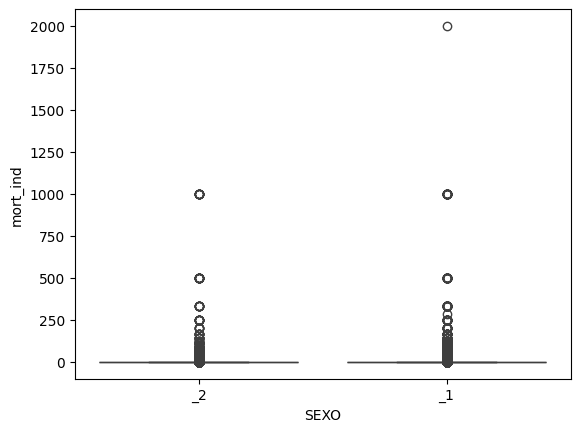

In [ ]:
### Exemplo Completo para Análise de Catetorias
df = dobr
var_cat = 'SEXO'
valor = 'mort_ind'

# Análise exploratória
print(df.groupby(var_cat)[valor].describe())

# Visualização
sns.boxplot(x=var_cat, y=valor, data=df)

# Teste ANOVA
from scipy import stats
grupos = dobr.groupby(var_cat)[valor].apply(list)
stats.f_oneway(*grupos)

In [ ]:
# Calcular ANOVA
stats.f_oneway(valores_categoria1, valores_categoria2, ...)

In [ ]:
# Agrupar por UF e calcular a média das variáveis numéricas
uf_means = dobr.groupby('UF')['mort_ind'].mean()

# Exibir as médias calculadas
print(uf_means)

UF
AC    0.465878
AL    1.128169
AM    1.014083
AP    0.961956
BA         inf
CE         inf
DF    0.015249
ES    0.402856
GO    0.984023
MA         inf
MG         inf
MS    0.701599
MT    1.772923
PA    0.705199
PB    1.375251
PE         inf
PI         inf
PR    0.707167
RJ    0.169224
RN         inf
RO    0.706810
RR    0.297789
RS         inf
SC         inf
SE    0.446625
SP    0.327713
TO         inf
Name: mort_ind, dtype: float64


In [ ]:
#Ajustar um tamanho para o gráfico (1000x1000)
plt.figure(figsize=(10, 10))

#Matriz de correlação
dataplot = sns.heatmap(dobr.corr(),
                       annot=True,
                       fmt='.1f') #annot são anotações e fmt a formatação dos valores

ValueError: could not convert string to float: 'V629'

<Figure size 1000x1000 with 0 Axes>